# Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\vinor\Sourcing open data in Phython Task6.1'

In [4]:
# Import data
df_kc_house = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.pkl'))

# Data Cleaning

In [5]:
df_kc_house.head()

,Id,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,1970-01-01 00:00:00.000000000,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,47.6168,-122.045


In [6]:
## Already my data is cleaned, eventhou checking whether it is clean.

In [7]:
# Finding Missing Values
df_kc_house.isnull().sum()

Id                0
Date              0
Price             0
Bedrooms          0
Bathrooms         0
Sqft_living       0
Sqft_lot          0
Floors            0
Waterfront        0
View              0
Condition         0
Grade             0
Sqft_Above        0
Sqft_Basement     0
Year_Built        0
Year_Renovated    0
Zipcode           0
Latitude          0
Longitude         0
dtype: int64

In [8]:
# Finding Duplicates
df_dups = df_kc_house[df_kc_house.duplicated()]

In [9]:
df_dups

,Id,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude


In [10]:
# No Missing & Duplicate.

In [11]:
# Check for mixed types.
for col in df_kc_house.columns.tolist():
  weird = (df_kc_house[[col]].map(type) != df_kc_house[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_kc_house[weird]) > 0:
    print (col)

In [12]:
# No mixed values.

In [13]:
# checking the variables datatype.
df_kc_house.dtypes

Id                         int64
Date              datetime64[ns]
Price                    float64
Bedrooms                   int64
Bathrooms                  int64
Sqft_living                int64
Sqft_lot                   int64
Floors                     int64
Waterfront                 int64
View                       int64
Condition                  int64
Grade                      int64
Sqft_Above                 int64
Sqft_Basement              int64
Year_Built        datetime64[ns]
Year_Renovated    datetime64[ns]
Zipcode                    int64
Latitude                 float64
Longitude                float64
dtype: object

In [14]:
#current dir
os.chdir(r'C:\\Users\\vinor\\Sourcing open data in Phython Task6.1\\04 Visualisation')
cwd = os.getcwd()
cwd

'C:\\Users\\vinor\\Sourcing open data in Phython Task6.1\\04 Visualisation'

###  Extreme values check

C:\Users\vinor\AppData\Local\Temp\ipykernel_31356\1393952932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kc_house['Price'], bins=25) # Shows extreme values
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

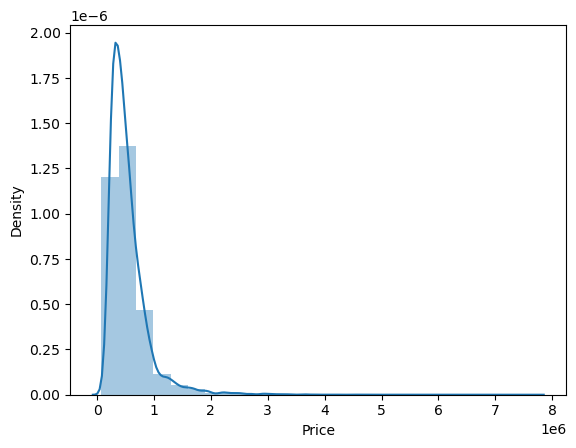

In [16]:
sns.distplot(df_kc_house['Price'], bins=25) # Shows extreme values

In [17]:
df_kc_house['Price'].mean() # Check the mean

540088.1417665294

In [18]:
df_kc_house['Price'].median() # Check the median

450000.0

In [111]:
df_kc_house['Price'].max() # Check the max

7700000.0

In [ ]:
## Analysis on Sqft_living

C:\Users\vinor\AppData\Local\Temp\ipykernel_31356\3733728973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kc_house['Sqft_living'], bins=25) # Shows extreme values
C:\Users\vinor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sqft_living', ylabel='Density'>

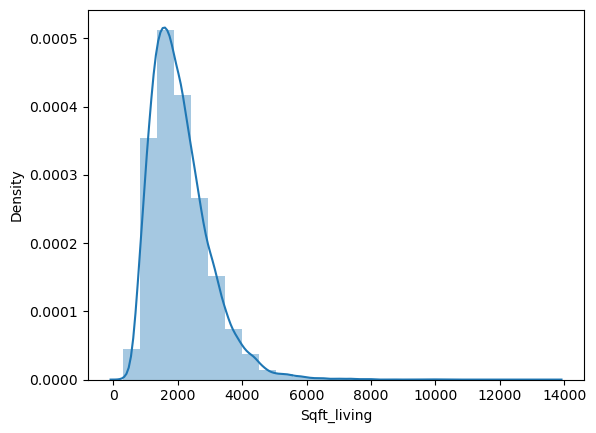

In [115]:
sns.distplot(df_kc_house['Sqft_living'], bins=25) # Shows extreme values

In [112]:
df_kc_house['Sqft_living'].mean() # Check the mean

2079.8997362698374

In [113]:
df_kc_house['Sqft_living'].median() # Check the median

1910.0

In [114]:
df_kc_house['Sqft_living'].max() # Check the max

13540

## Hypothesis
## Some of the outliers in the high values may need to be removed, but let's try without doing so first!.
## Price increases in relation to Sqft_living

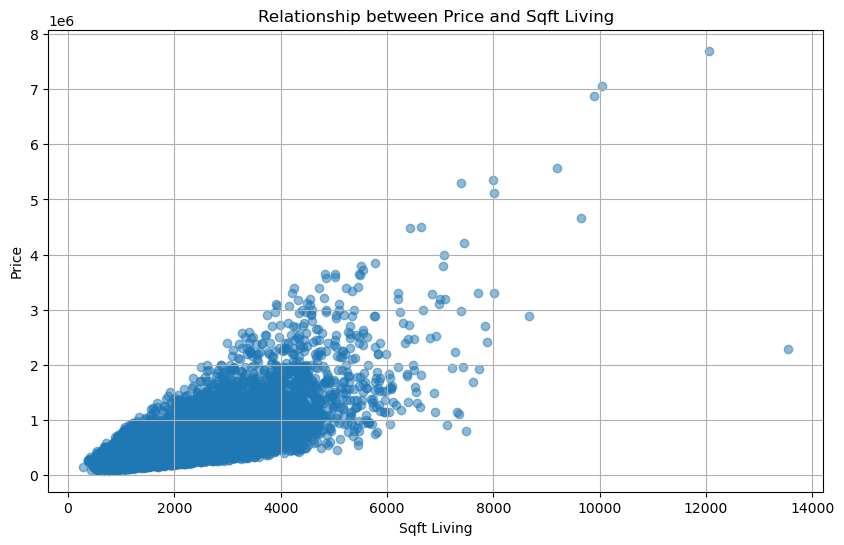

In [142]:
import matplotlib.pyplot as plt

# Extract 'Price' and 'Sqft_living' columns from the DataFrame
price = df_kc_house['Price']
sqft_living = df_kc_house['Sqft_living']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sqft_living, price, alpha=0.5)
plt.title('Relationship between Price and Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Data Preparing for Regression analysis

In [60]:
# I would like to test the relationship between Sqft_living & Price. whether the price is high if Sqft_living area is high.

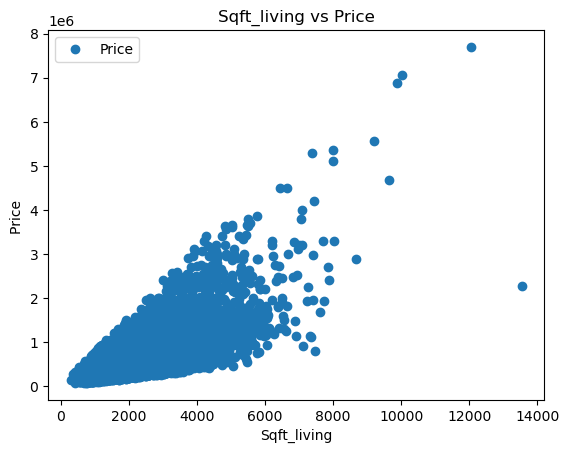

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_kc_house.plot(x = 'Sqft_living', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sqft_living vs Price')  
plt.xlabel('Sqft_living')  
plt.ylabel('Price ')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_kc_house['Sqft_living'].values.reshape(-1,1)
Y = df_kc_house['Price'].values.reshape(-1,1)

In [47]:
X

array([[ 1180],
       [ 2570],
       [  770],
       [ 1960],
       [ 1680],
       [ 5420],
       [ 1715],
       [ 1060],
       [ 1780],
       [ 1890],
       [ 3560],
       [ 1160],
       [ 1430],
       [ 1370],
       [ 1810],
       [ 2950],
       [ 1890],
       [ 1600],
       [ 1200],
       [ 1250],
       [ 1620],
       [ 3050],
       [ 2270],
       [ 1070],
       [ 2450],
       [ 1710],
       [ 2450],
       [ 1400],
       [ 1520],
       [ 2570],
       [ 2320],
       [ 1190],
       [ 2330],
       [ 1090],
       [ 2060],
       [ 2300],
       [ 1660],
       [ 2360],
       [ 1220],
       [ 2620],
       [ 2570],
       [ 4220],
       [ 3595],
       [ 1570],
       [ 1280],
       [ 3160],
       [  990],
       [ 2290],
       [ 1250],
       [ 2753],
       [ 1190],
       [ 3150],
       [ 1410],
       [ 1980],
       [ 2730],
       [ 2830],
       [ 2250],
       [ 2420],
       [ 3250],
       [ 1850],
       [ 2150],
       [ 1260],
       [

In [48]:
Y

array([[ 221900.],
       [ 538000.],
       [ 180000.],
       [ 604000.],
       [ 510000.],
       [1225000.],
       [ 257500.],
       [ 291850.],
       [ 229500.],
       [ 323000.],
       [ 662500.],
       [ 468000.],
       [ 310000.],
       [ 400000.],
       [ 530000.],
       [ 650000.],
       [ 395000.],
       [ 485000.],
       [ 189000.],
       [ 230000.],
       [ 385000.],
       [2000000.],
       [ 285000.],
       [ 252700.],
       [ 329000.],
       [ 233000.],
       [ 937000.],
       [ 667000.],
       [ 438000.],
       [ 719000.],
       [ 580500.],
       [ 280000.],
       [ 687500.],
       [ 535000.],
       [ 322500.],
       [ 696000.],
       [ 550000.],
       [ 640000.],
       [ 240000.],
       [ 605000.],
       [ 625000.],
       [ 775000.],
       [ 861990.],
       [ 685000.],
       [ 309000.],
       [ 488000.],
       [ 210490.],
       [ 785000.],
       [ 450000.],
       [1350000.],
       [ 228000.],
       [ 345000.],
       [ 600

In [49]:
# Split data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Regression Analysis

In [50]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
# Fit the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [52]:
# Predict the values of Y using X.

Y_predicted = regression.predict(X_test)

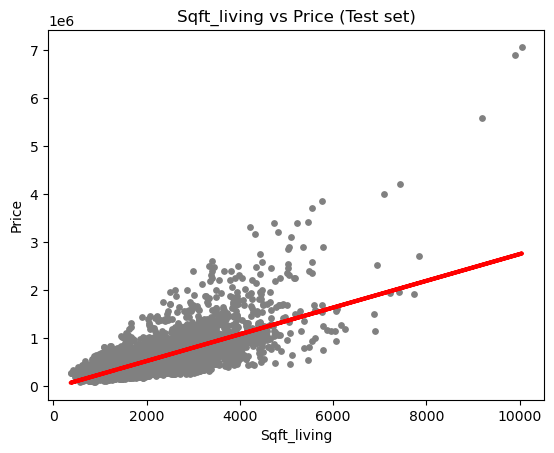

In [53]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('Sqft_living vs Price (Test set)')
plot_test.xlabel('Sqft_living')
plot_test.ylabel('Price')
plot_test.show()

In [54]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(Y_test, Y_predicted) # This is the mean squared error
r2 = r2_score(Y_test, Y_predicted) # This is the R2 score. 

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


## Slope: The slope value is approximately 278.32860644, suggesting that for every one-unit increase in the predictor variable, the predicted outcome variable increases by approximately 278.33 units.
## Mean squared error: The mean squared error is approximately 70170013932.11592, indicating the average squared difference between the actual and predicted values is quite high.
## R2 score: The R2 score is approximately 0.4889, suggesting that approximately 48.89% of the variability in the dependent variable can be explained by the independent variable(s) in the model. Higher values indicating a better fit of the model to the data.

## In summary, the slope coefficient provides insight into the direction and magnitude of the relationship, and the R2 score indicates the proportion of variability explained by the model, the relatively high MSE suggests that there may be limitations in the model's predictive accuracy. Further analysis and model refinement may be necessary to improve the model's performance and accuracy.

In [66]:
Y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       [ 276617.72677788],
       [ 847191.36998305],
       [ 421348.60212748],
       [ 440831.60457839],
       [ 668504.40464758],
       [ 646794.77334514],
       [1203451.98622823],
       [ 618961.91270098],
       [ 440831.60457839],
       [ 246001.58006931],
       [ 335066.7341306 ],
       [ 847191.36998305],
       [ 301667.30135762],
       [ 387949.1693545 ],
       [ 554946.33321943],
       [ 220952.00548957],
       [ 343416.59232385],
       [ 426915.17425631],
       [ 579995.90779916],
       [ 490930.75373787],
       [ 268267.86858463],
       [ 621745.1987654 ],
       [ 268267.86858463],
       [ 387949.1693545 ],
       [ 418565.31606307],
       [ 549379.76109059],
       [ 432481.74638515],
       [ 538246.61683293],
       [ 524330.18651086],
       [ 674627.63398929],
       [ 888940.66094928],
       [ 816575.22327448],
       [ 468664.46522255],
       [ 312800.44561528],
 

In [59]:
# Create a dataframe comparing the actual and predicted values of y.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.000,360116.309
1,1578000.000,1261900.994
2,562100.000,362899.595
3,631500.000,276617.727
4,780000.000,847191.370
5,485000.000,421348.602
6,340000.000,440831.605
7,335606.000,668504.405
8,425000.000,646794.773
9,490000.000,1203451.986


# Compare how the regression fits into the training set

In [67]:
# Predict.
Y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [68]:
rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [69]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91106
R2 score:  0.49453356717789776


##  the slope coefficient remains unchanged, indicating the same relationship between the predictor variable(s) and the outcome variable. However, there are improvements in both the MSE and R2 score, suggesting better accuracy and explanatory power in the model's predictions.

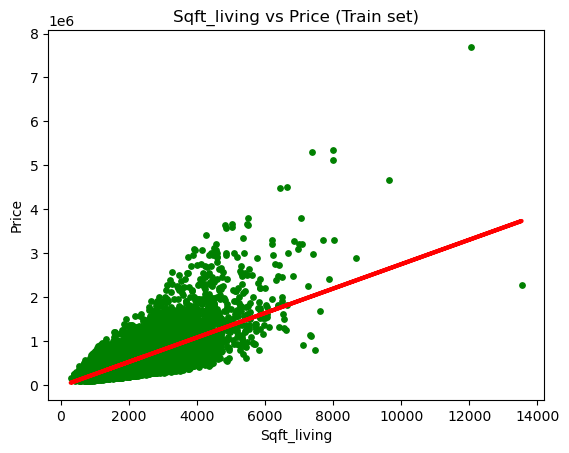

In [70]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Sqft_living vs Price (Train set)')
plot_test.xlabel('Sqft_living')
plot_test.ylabel('Price')
plot_test.show()

### performance improvement after removing outliers


In [144]:
# Clean the extreme values from the "Sqft_living" variable observed during the consistency checks.

df_test = df_kc_house[df_kc_house['Sqft_living'] <= 125000.0]

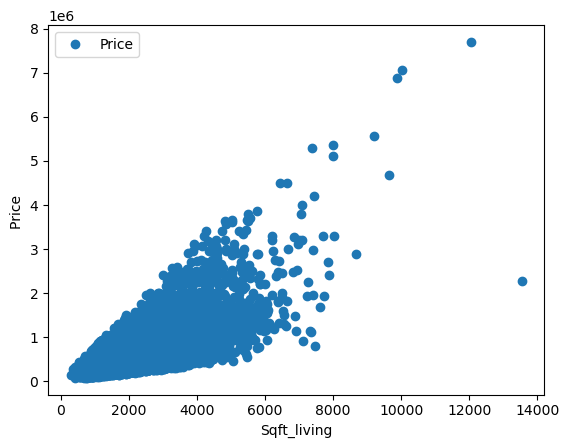

In [145]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Sqft_living', y='Price',style='o')
plt.xlabel('Sqft_living')  
plt.ylabel('Price ')  
plt.show()

In [146]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_2 = df_test['Sqft_living'].values.reshape(-1,1)
Y_2 = df_test['Price'].values.reshape(-1,1)

In [147]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=0)

In [148]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [149]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [150]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [151]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


## can see some improvements in terms of MSE and a slightly higher R2 score. However, the efficiency comparison based solely on the slope can be subjective and would require further context about the specific goals and requirements of the analysis.

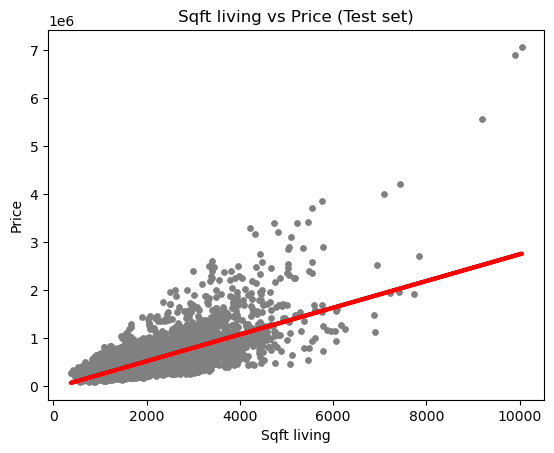

In [152]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Sqft living vs Price (Test set)')
plot_test.xlabel('Sqft living')
plot_test.ylabel('Price')
plot_test.show()

In [153]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,297000.000,360116.309
1,1578000.000,1261900.994
2,562100.000,362899.595
3,631500.000,276617.727
4,780000.000,847191.370
5,485000.000,421348.602
6,340000.000,440831.605
7,335606.000,668504.405
8,425000.000,646794.773
9,490000.000,1203451.986


## The R2 score is approximately 0.4889, indicating that around 48.89% of the variance in property prices can be explained by the square footage of living space.
## The MSE is approximately 70170013932.12, suggesting the average squared difference between the actual and predicted property prices.
## In summary, the R2 score indicates that the model explains a moderate amount of variance in property prices, the relatively high MSE suggests that there is room for improvement in predictive accuracy.  
## further model refinement and evaluation may be necessary to enhance predictive performance. considering other factors beyond square footage of living space may improve the model's predictive ability.